# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 19 Data Modeling (part 3)

### Date: November 3, 2022

### To-Dos From Last Class:

* N/A
    
### Today:

* Evaluating assumptions of the General Linear Model (GLM)
    * <a href="https://www.frontiersin.org/articles/10.3389/fpsyg.2012.00322/full">Mini-Review article for reference</a>
* Hunting for outliers & influential observations

### Homework

* Assignment 5: <a href="https://www.dropbox.com/request/yieJlRt7WYzOpWvkUJ0S">Statistical Modeling</a> (before 11/15, 23:00 MDT)

In [10]:
# plot theme stuff
# Many palettes available online, can customize
# these are from: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9
my_palette <- c("#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00")

# This is the basic function I use for all the ggplots I create. 
# Modified from this black themed ggplot function: https://gist.github.com/jslefche/eff85ef06b4705e6efbc
my_theme = function(base_size = 24, base_family = "") {
  
  theme_grey(base_size = base_size, base_family = base_family) %+replace%
    
    theme(
      # Specify axis options
      axis.line = element_blank(),  
      axis.text.x = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.text.y = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.ticks = element_line(color = "black", size  =  0.2),
      axis.title.x = element_text(size = base_size, color = "black", margin = margin(10, 0, 0, 0)),
      axis.title.y = element_text(size = base_size, color = "black", angle = 90, margin = margin(0, 10, 0, 0)),  
      axis.ticks.length = unit(0.3, "lines"),   
      # Specify legend options
      legend.background = element_rect(color = NA, fill = "#ffffff"),  
      legend.key = element_rect(color = "black",  fill = "#ffffff"),  
      legend.key.size = unit(2, "lines"),  
      legend.key.height = NULL,  
      legend.key.width = NULL,      
      legend.text = element_text(size = base_size*0.8, color = "black"),  
      legend.title = element_text(size = base_size*0.8, face = "bold", hjust = 0, color = "black"),
      legend.position = "right",  
      legend.text.align = NULL,  
      legend.title.align = NULL,  
      legend.direction = "vertical",  
      legend.box = NULL, 
      # Specify panel options
      panel.background = element_rect(fill = "#ffffff", color  =  NA),  
      panel.border = element_rect(fill = NA, color = "black"),  
      panel.grid.major = element_line(color = "#ffffff"),  
      panel.grid.minor = element_line(color = "#ffffff"),  
      panel.spacing = unit(2, "lines"),
      # Specify facetting options
      strip.background = element_rect(fill = "grey30", color = "grey10"),  
      strip.text.x = element_text(size = base_size*0.8, color = "black"),  
      strip.text.y = element_text(size = base_size*0.8, color = "black",angle = -90),  
      # Specify plot options
      plot.background = element_rect(color = "#ffffff", fill = "#ffffff"),  
      plot.title = element_text(size = base_size*1.2, color = "black"),  
      plot.margin = unit(rep(1, 4), "lines")
    ) 
}

## Section 1: So you want to model some data?

<img src="img/what-does-that-mean-david.gif" width=300>

### What did you find?
* Let's say you have...
1. Acquired some data
2. Wrangled the data
3. Computed descriptive statistics (central tendencies, variance, etc.)
4. Generated some visualizations
* Remaining questions: What did you find?

__Inferential (or predictive) modeling is used to generate an interim answer about your pre-defined research questions / hypotheses__

## Which model is appropriate?

<img src="img/decision_tree.png" width=500>

__Key questions:__
1. Are the main outcome measures you're interested in continuous or categorical?
2. If continuous, is your research question about associations or differences?
3. If continuous + associations...
    - Independent and dependent variable?
4. If continuous + differences...
    - Differences between what?

# Exercise #1:
## Gebotys and Roberts (1989) were interested in examining the effects of several variables on the “seriousness rating of the crime”. The variables to be examined within this example are “age” (in years), the “amount of television news watched in hours per week” (i.e., ‘tvnews’), and whether or not the respondents had experience being a victim of crime in the past (i.e., 'experience').

In [13]:
library(tidyverse)

In [14]:
df <- tibble(pid  = c(1,2,3,4,5,6,7,8,9,10,11),
             age = c(10,25,26,25,30,34,40,40,40,25,80),
             tv_news = c(4.0,5.0,5.0,4.5,6.0,7.0,5.5,6.0,7.0,8.5,9.0),
             experience = c(0,0,0,0,0,1,0,1,1,1,1),
             crime_seriousness = c(21,28,27,26,33,36,31,35,41,80,95))
df

pid,age,tv_news,experience,crime_seriousness
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,4.0,0,21
2,25,5.0,0,28
3,26,5.0,0,27
4,25,4.5,0,26
5,30,6.0,0,33
6,34,7.0,1,36
7,40,5.5,0,31
8,40,6.0,1,35
9,40,7.0,1,41


In [15]:
df <- tibble(pid  = c(1,2,3,4,5,6,7,8,9,10,11),
             age = c(10,25,26,25,30,34,40,40,40,25,80),
             tv_news = c(4.0,5.0,5.0,4.5,6.0,7.0,5.5,6.0,7.0,8.5,9.0),
             experience = as_factor(c(0,0,0,0,0,1,0,1,1,1,1)),
             crime_seriousness = c(21,28,27,26,33,36,31,35,41,80,95))
df

pid,age,tv_news,experience,crime_seriousness
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,10,4.0,0,21
2,25,5.0,0,28
3,26,5.0,0,27
4,25,4.5,0,26
5,30,6.0,0,33
6,34,7.0,1,36
7,40,5.5,0,31
8,40,6.0,1,35
9,40,7.0,1,41


### Exercise 1a: Is there an association between age and crime seriousness ratings?

`geom_smooth()` using formula 'y ~ x'



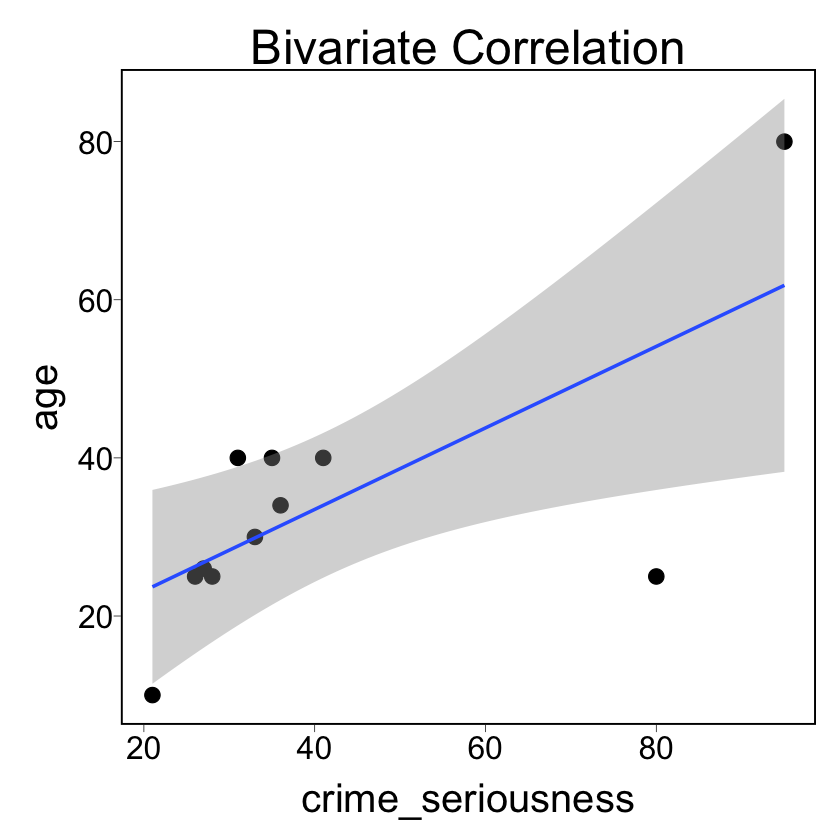

In [5]:
ggplot(df,aes(x=crime_seriousness,y=age)) + 
    geom_point(size=4) + 
    geom_smooth(method=lm) +
    my_theme() +
    ggtitle('Bivariate Correlation')

`geom_smooth()` using formula 'y ~ x'



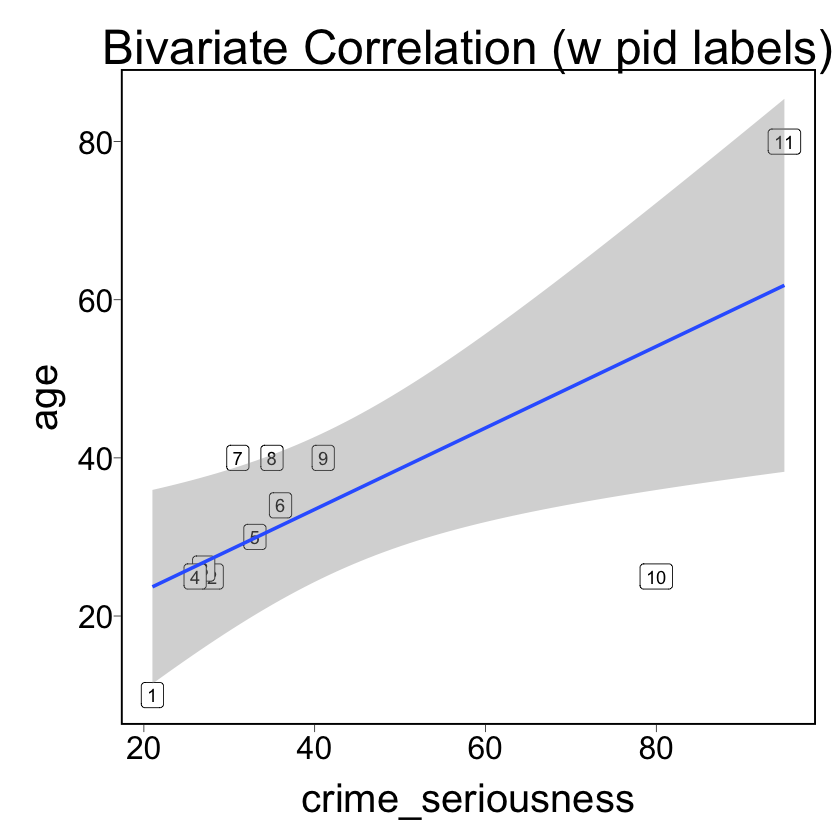

In [6]:
ggplot(df,aes(x=crime_seriousness,y=age,label=pid)) + 
    geom_label() + 
    geom_smooth(method=lm) +
    my_theme() +
    ggtitle('Bivariate Correlation (w pid labels)')

__Linear relationship: the variables change together at a constant rate__

In [7]:
# testing the LINEAR relationship between variables
m_r <- cor.test(df$crime_seriousness,df$age)
print(m_r)


	Pearson's product-moment correlation

data:  df$crime_seriousness and df$age
t = 2.8865, df = 9, p-value = 0.01799
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1600212 0.9133409
sample estimates:
      cor 
0.6933405 



__Monotonic relationship: the variables change together, but not _necessarily_ at a constant rate.__

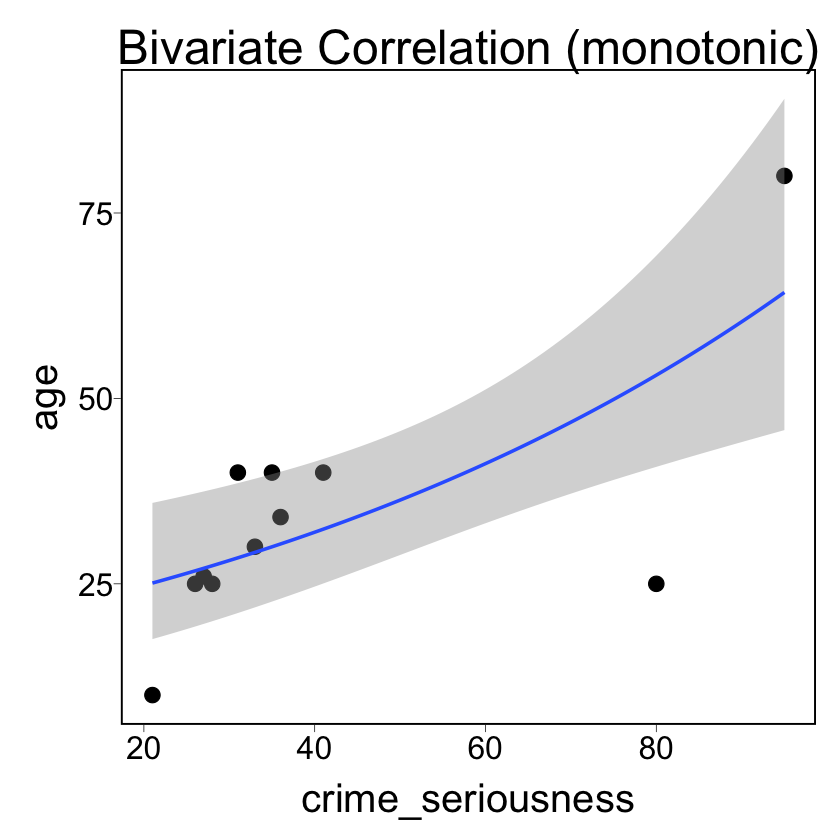

In [8]:
ggplot(df,aes(x=crime_seriousness,y=age)) + 
    geom_point(size=4) +
    geom_smooth(method = "glm", formula = y~x,method.args = list(family = gaussian(link = 'log'))) +
    my_theme() +
    ggtitle('Bivariate Correlation (monotonic)')

In [9]:
# testing the MONOTONIC relationship between variables (i.e., can be appropriate in both linear and nonlinear relationships)
m_rho <- cor.test(df$crime_seriousness,df$age,method='spearman')
print(m_rho)

Warning message in cor.test.default(df$crime_seriousness, df$age, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df$crime_seriousness and df$age
S = 77.383, p-value = 0.03098
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6482593 



### Exercise 1b: Does tv news viewing predict crime seriousness ratings?

`geom_smooth()` using formula 'y ~ x'



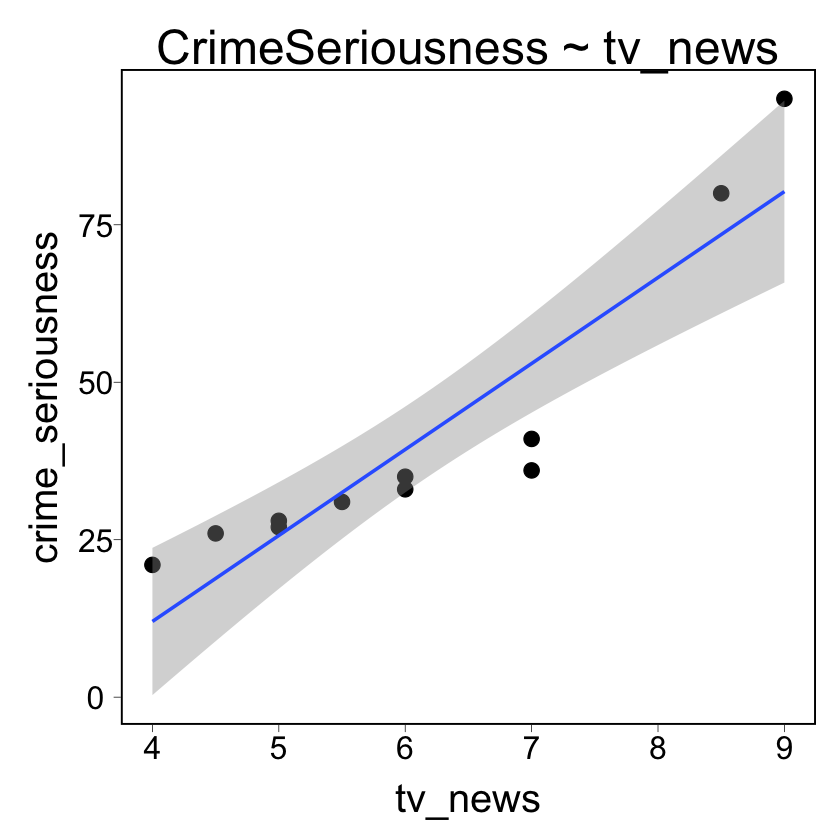

In [12]:
ggplot(df,aes(x=tv_news,y=crime_seriousness)) + 
    geom_point(size=4) + 
    geom_smooth(method=lm) +
    my_theme() +
    ggtitle('CrimeSeriousness ~ tv_news')

__Linear regression: Does $y$ change at a constant rate as a function of $x$.__

In [16]:
m_regr <- lm(crime_seriousness~tv_news,df)
summary(m_regr)


Call:
lm(formula = crime_seriousness ~ tv_news, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.971  -5.320   1.331   6.854  14.726 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -42.587     12.448  -3.421  0.00761 ** 
tv_news       13.651      1.969   6.934  6.8e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.95 on 9 degrees of freedom
Multiple R-squared:  0.8423,	Adjusted R-squared:  0.8248 
F-statistic: 48.08 on 1 and 9 DF,  p-value: 6.803e-05


__What does the "estimate" mean?__

In [17]:
# same as above, with standardized x and y values for cross-dataset interpretability
options(scipen = 999)

# adding z-transformed values
df <- df %>%
    mutate(zcrime = as.numeric(scale(crime_seriousness)),
          ztv_news = as.numeric(scale(tv_news)),
          zage = as.numeric(scale(age)))

# rerunning model with zvars
m_zregr <- lm(zcrime~ztv_news,df)
summary(m_zregr)


Call:
lm(formula = zcrime ~ ztv_news, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71389 -0.22379  0.05599  0.28831  0.61944 

Coefficients:
                         Estimate            Std. Error t value Pr(>|t|)    
(Intercept) 0.0000000000000002848 0.1261979679440210778   0.000        1    
ztv_news    0.9177871875218777120 0.1323575454007824559   6.934 0.000068 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4186 on 9 degrees of freedom
Multiple R-squared:  0.8423,	Adjusted R-squared:  0.8248 
F-statistic: 48.08 on 1 and 9 DF,  p-value: 0.00006803


`geom_smooth()` using formula 'y ~ x'



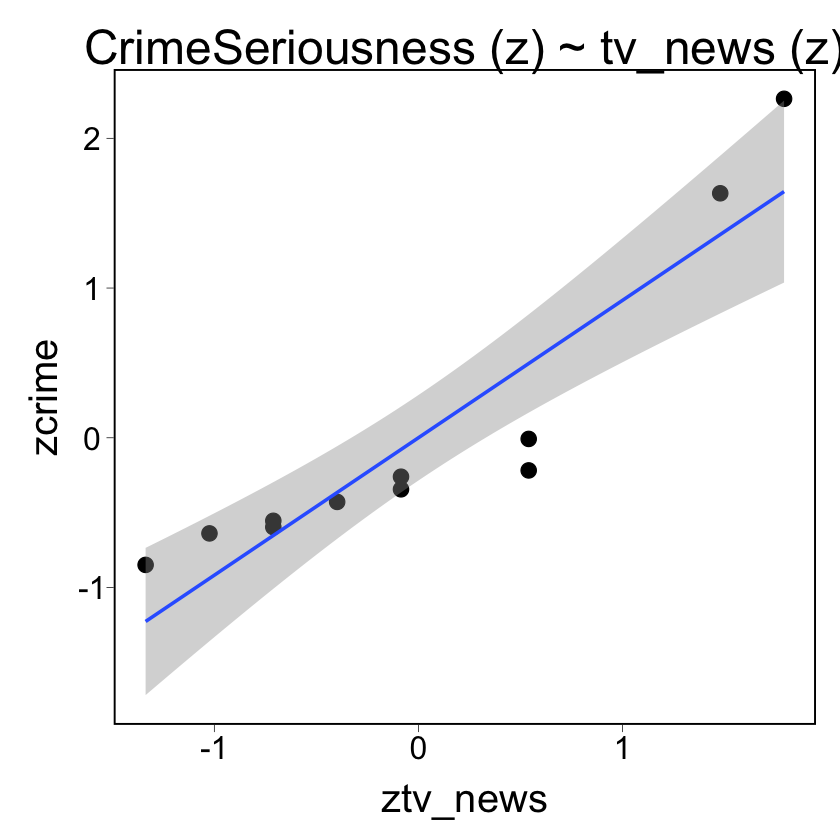

In [15]:
ggplot(df,aes(x=ztv_news,y=zcrime)) + 
    geom_point(size=4) + 
    geom_smooth(method=lm) +
    my_theme() +
    ggtitle('CrimeSeriousness (z) ~ tv_news (z)')

### Exercise 1c: Does the effect of TV watching on crime seriousness ratings vary as a function of age?

In [18]:
# rerunning model with multiple zvars
m_mregr <- lm(zcrime~ztv_news+zage,df)
summary(m_mregr)


Call:
lm(formula = zcrime ~ ztv_news + zage, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67406 -0.23537  0.05205  0.35156  0.47868 

Coefficients:
                         Estimate            Std. Error t value Pr(>|t|)   
(Intercept) 0.0000000000000003051 0.1314557175440862480   0.000   1.0000   
ztv_news    0.8450670994021650673 0.1922693382346633284   4.395   0.0023 **
zage        0.1043338856582620572 0.1922693382346633006   0.543   0.6022   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.436 on 8 degrees of freedom
Multiple R-squared:  0.8479,	Adjusted R-squared:  0.8099 
F-statistic:  22.3 on 2 and 8 DF,  p-value: 0.0005348


In [19]:
# rerunning model with zvars
m_intregr <- lm(zcrime~ztv_news*zage,df)
summary(m_intregr)


Call:
lm(formula = zcrime ~ ztv_news * zage, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58881 -0.14457  0.07144  0.15597  0.42823 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.1537     0.1230  -1.250 0.251396    
ztv_news        0.9701     0.1617   5.998 0.000543 ***
zage           -0.2107     0.2024  -1.041 0.332557    
ztv_news:zage   0.2426     0.1021   2.376 0.049201 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3468 on 7 degrees of freedom
Multiple R-squared:  0.9158,	Adjusted R-squared:  0.8797 
F-statistic: 25.38 on 3 and 7 DF,  p-value: 0.0003897


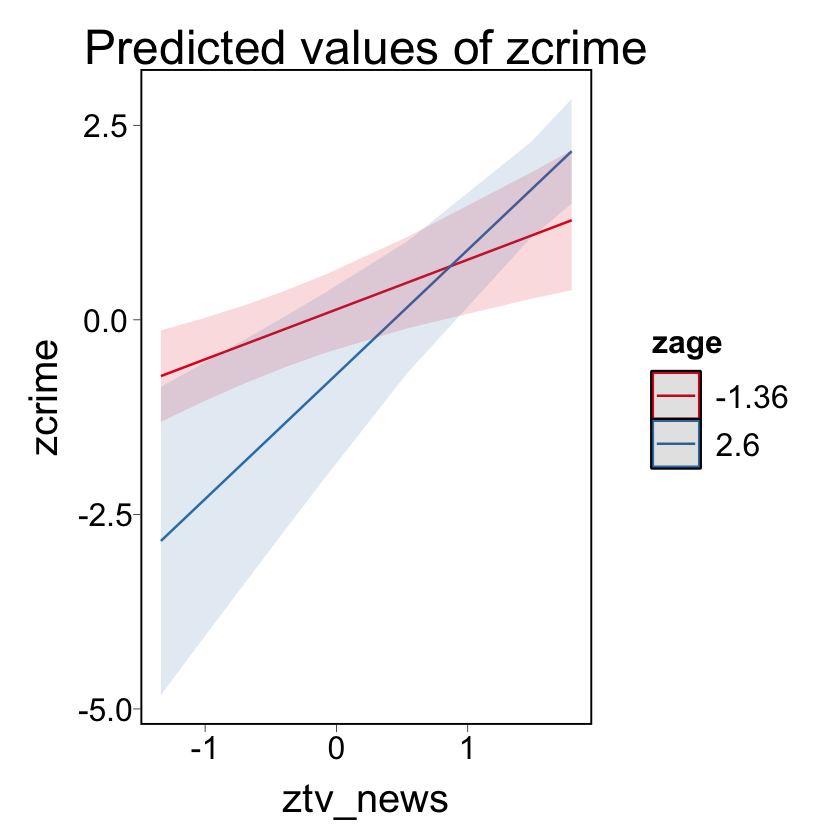

In [18]:
library(sjPlot)
plot_model(m_intregr, type = "int") + 
    my_theme() 

### Exercise 1d: Does prior experience being the victim of a crime influence perceived crime seriousness?

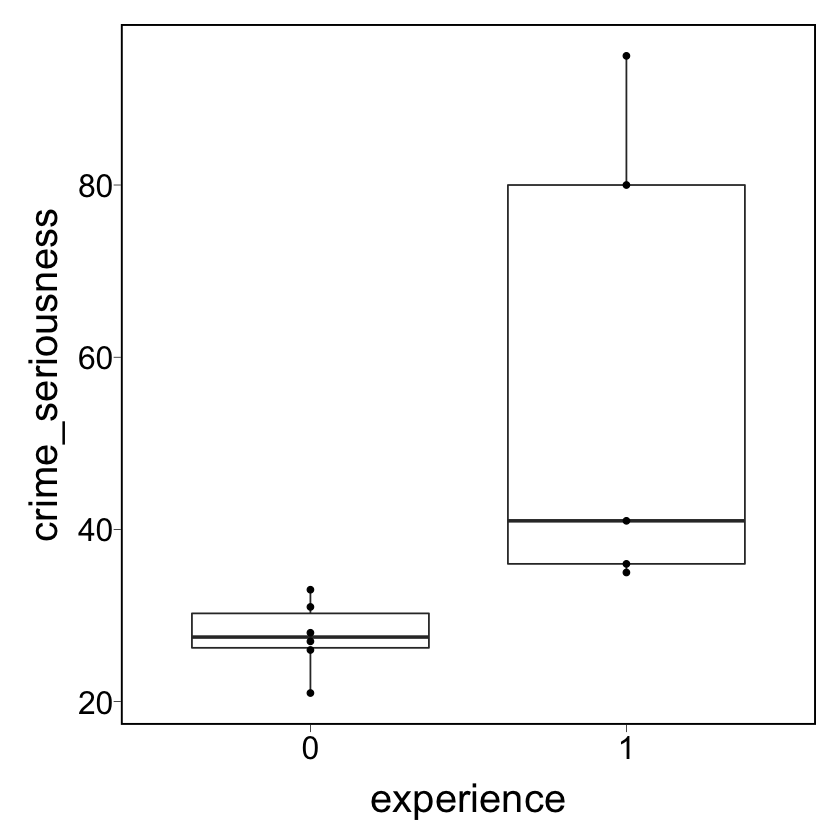

In [20]:
ggplot(df,aes(x = experience, y = crime_seriousness)) +
    geom_boxplot() +
    geom_point() +
    my_theme()

In [21]:
m_ttest <- t.test(crime_seriousness~experience,alternative="less",paired=FALSE,var.equal=FALSE,df)
print(m_ttest)


	Welch Two Sample t-test

data:  crime_seriousness by experience
t = -2.3464, df = 4.1479, p-value = 0.03825
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.993763
sample estimates:
mean in group 0 mean in group 1 
       27.66667        57.40000 



## Parameteric / GLM Assumptions:

<img src="img/decision_tree.png" width=300>

1. Independence
2. Normality
3. Equal variances

## Assumption 1: Independence

* ___Observations are independent of each other___

### Common violations:
* Repeated-measures designs
* Nested designs (e.g. workers on a team, team within a department, departments within an org.)

### Test:

In [28]:
library(car)
m_ind <- durbinWatsonTest(m_mregr)
print(m_ind)

m_ind_2 <- durbinWatsonTest(m_regr)
print(m_ind_2)

 lag Autocorrelation D-W Statistic p-value
   1       0.2470191      1.237698    0.15
 Alternative hypothesis: rho != 0
 lag Autocorrelation D-W Statistic p-value
   1       0.2212929      1.223509   0.064
 Alternative hypothesis: rho != 0


## Assumption 2: Normality

* ___There is an assumption that population data are normally distributed___

### Common violations:
* Most datasets contain at least one non-normal variable...

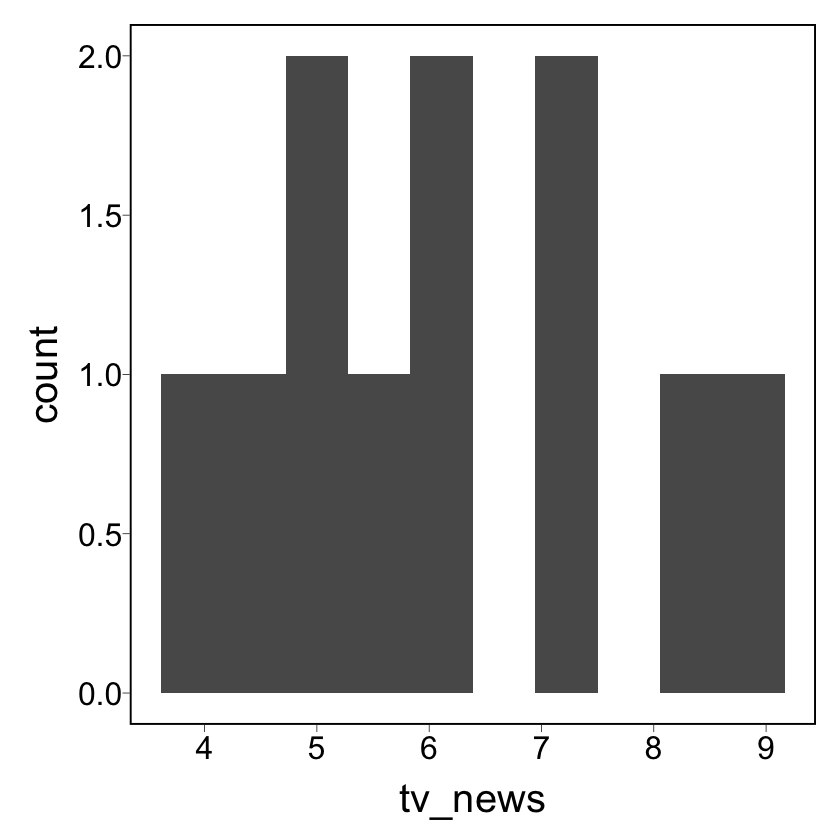

In [29]:
ggplot(df,aes(x = tv_news)) +
    geom_histogram(bins=10) +
    my_theme()

In [30]:
m_norm_tv <- shapiro.test(df$tv_news)
print(m_norm_tv)


	Shapiro-Wilk normality test

data:  df$tv_news
W = 0.93974, p-value = 0.5175



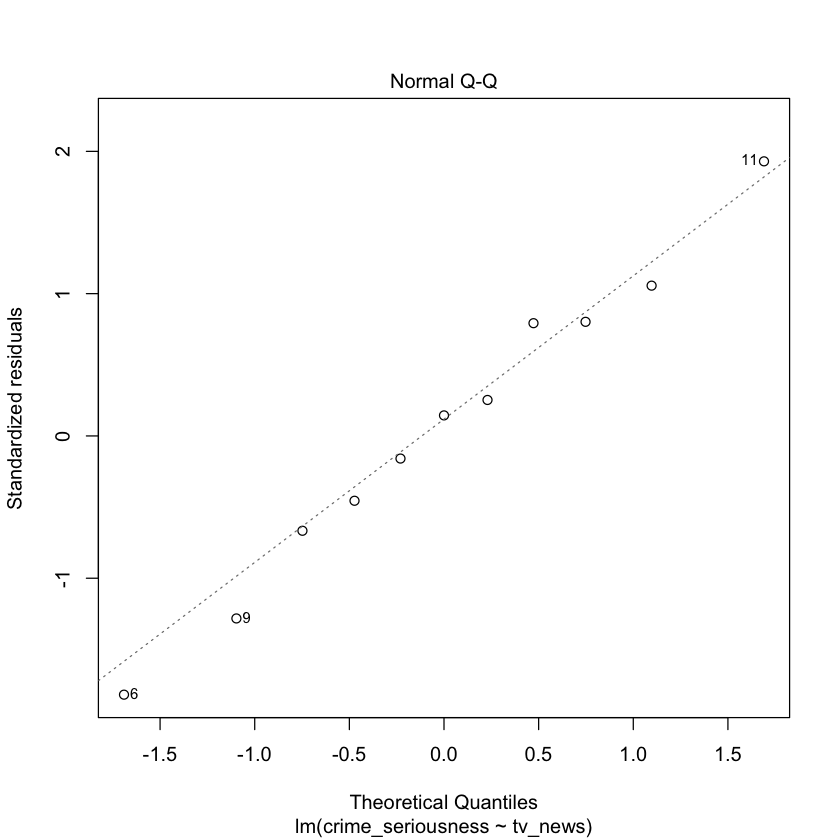

In [31]:
plot(m_regr,which=2)

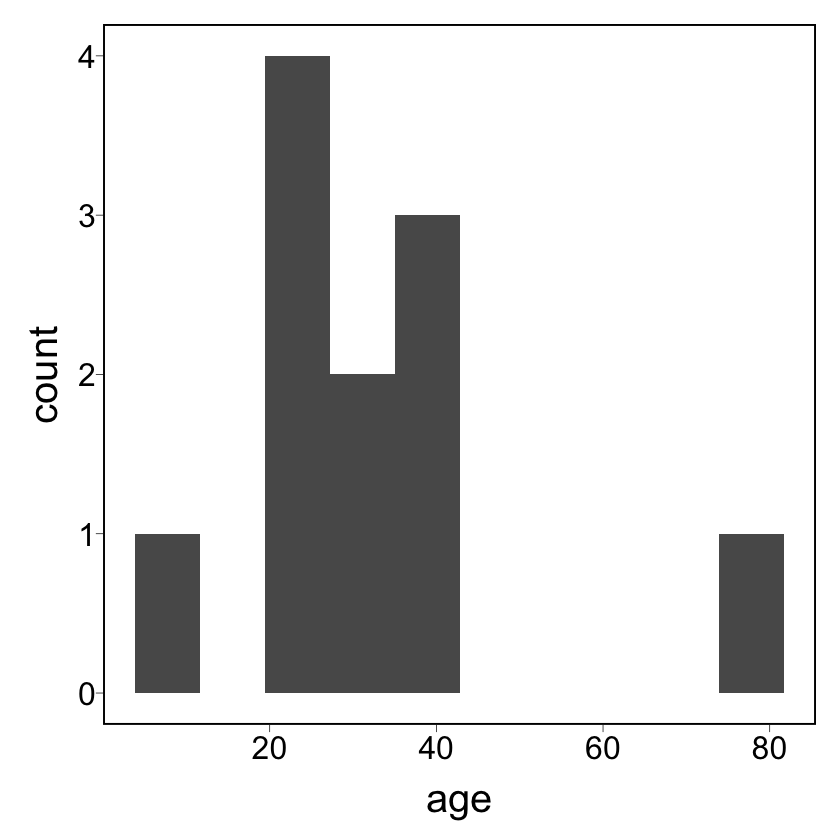

In [32]:
ggplot(df,aes(x = age)) +
    geom_histogram(bins=10) +
    my_theme()

In [33]:
m_norm_age <- shapiro.test(df$age)
print(m_norm_age)


	Shapiro-Wilk normality test

data:  df$age
W = 0.80927, p-value = 0.01246



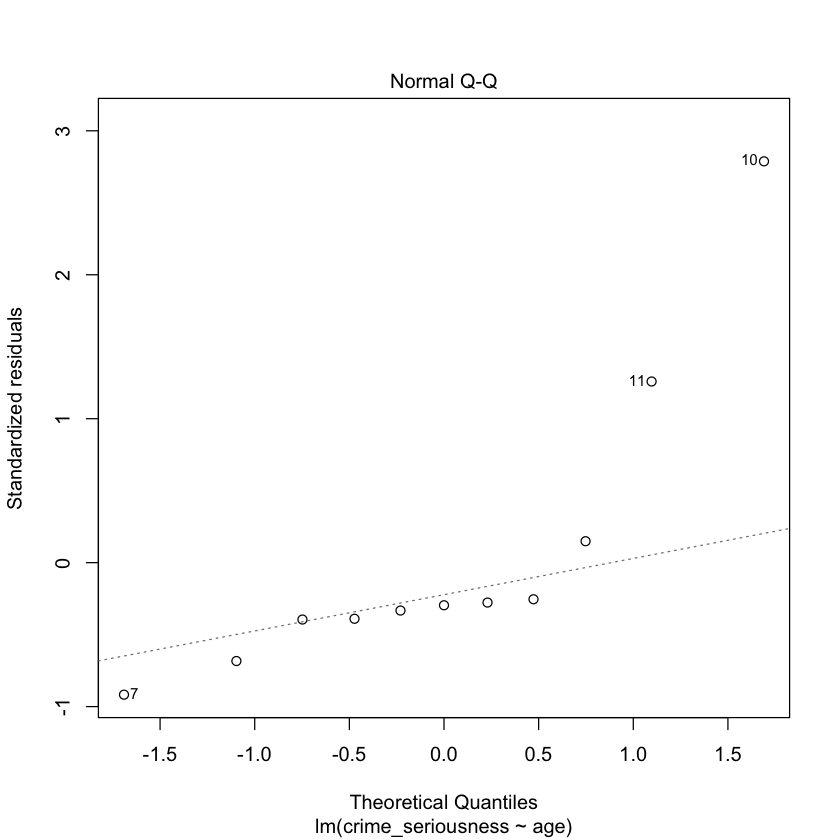

In [39]:
m_regr_age <- lm(crime_seriousness~age,df)
plot(m_regr_age,which=2)

## Assumption 3: Equal variances

* ___Across different types of GLM-family tests, there are common assumptions about equal variances___

### Variations on a theme...
1. Homogeneity of variance: Differences, single predictor variable (e.g. t.test, one-way ANOVA)

In [40]:
# F-test to compare variances: homogeneity across one 2-level factor
# m_ttest <- t.test(crime_seriousness~experience,df)
var.test(crime_seriousness~experience,df)


	F test to compare two variances

data:  crime_seriousness by experience
F = 0.022157, num df = 5, denom df = 4, p-value = 0.0008186
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.002366112 0.163696230
sample estimates:
ratio of variances 
        0.02215739 


In [41]:
# Bartlett test: homogeneity of variance acros one k-level factor
df <- df %>%
    mutate(age_ord = ifelse(age<=25, 1,
                           ifelse(age < 40, 2,
                                 3)))
bartlett.test(crime_seriousness~age_ord,df)


	Bartlett test of homogeneity of variances

data:  crime_seriousness by age_ord
Bartlett's K-squared = 4.3803, df = 2, p-value = 0.1119


2. Homoscedasticity: Continuous, do residuals of predictor variables have similar variance (e.g. multiple regression)

In [43]:
# Goldfed-Quandt Test: removes observations in the center,
# tests if the spread of residuals is different on either side of center

library(lmtest)
gqtest(m_mregr)


	Goldfeld-Quandt test

data:  m_mregr
GQ = 217.89, df1 = 3, df2 = 2, p-value = 0.004572
alternative hypothesis: variance increases from segment 1 to 2


3. Sphericity: Differences, multilevel factor(s) (e.g. repeated-measures and mixed model ANOVA)
    * Mauchly's test -- don't do repeated-measures in R unless using hierarchical models!

## Hunting for Outliers

`geom_smooth()` using formula 'y ~ x'



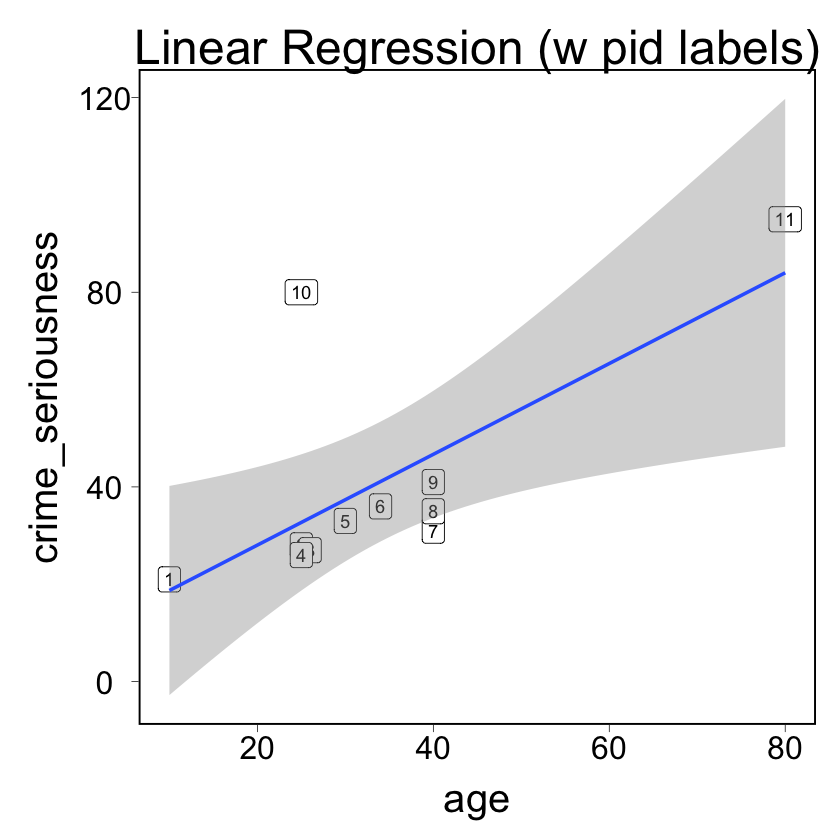

In [45]:
ggplot(df,aes(x=age,y=crime_seriousness,label=pid)) + 
    geom_label() + 
    geom_smooth(method=lm) +
    my_theme() +
    ggtitle('Linear Regression (w pid labels)')

In [48]:
zcutoff <-  2.5

df_extremes <- df %>%
    mutate(zres = rstandard(m_regr_age),
         outlier = ifelse(zres<zcutoff & zres > -zcutoff,0,1))
print(df_extremes %>% select(pid,zres,outlier))

# A tibble: 11 × 3
     pid   zres outlier
   <dbl>  <dbl>   <dbl>
 1     1  0.149       0
 2     2 -0.277       0
 3     3 -0.390       0
 4     4 -0.395       0
 5     5 -0.254       0
 6     6 -0.296       0
 7     7 -0.917       0
 8     8 -0.683       0
 9     9 -0.333       0
10    10  2.79        1
11    11  1.26        0


## Hunting for Influential Observations

In [53]:
df_extremes <- df_extremes %>%
    mutate(h = hatvalues(m_regr_age),
          influential = ifelse(h > (2*mean(h)),1,0))

print(df_extremes %>% select(pid,h,influential))

# A tibble: 11 × 3
     pid      h influential
   <dbl>  <dbl>       <dbl>
 1     1 0.277            0
 2     2 0.117            0
 3     3 0.112            0
 4     4 0.117            0
 5     5 0.0963           0
 6     6 0.0909           0
 7     7 0.102            0
 8     8 0.102            0
 9     9 0.102            0
10    10 0.117            0
11    11 0.766            1


### Re-running age model without outlier and influential observation

`geom_smooth()` using formula 'y ~ x'



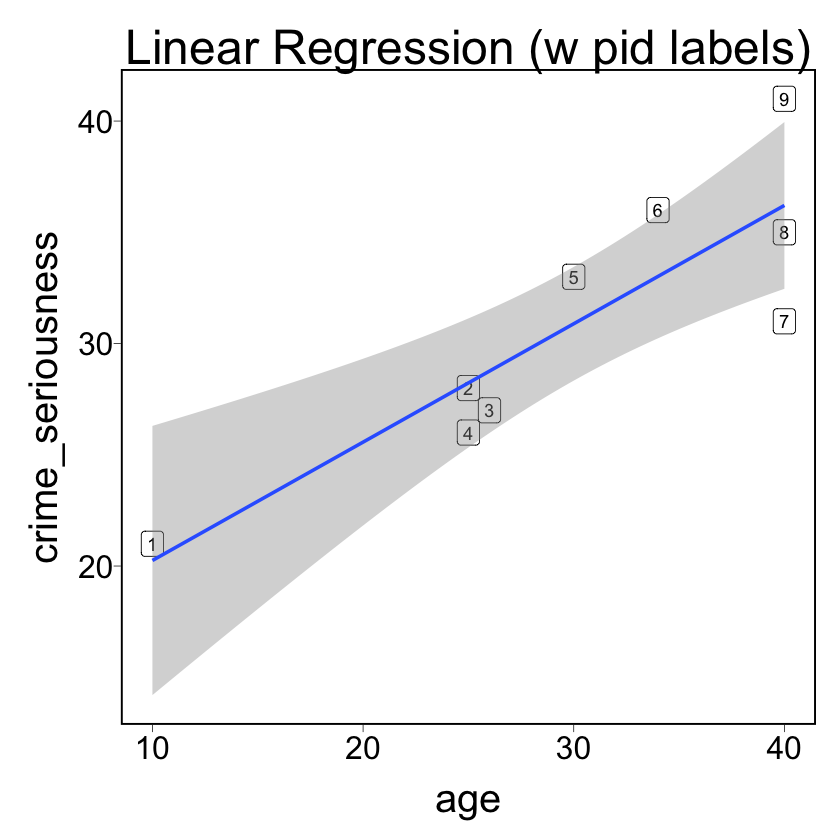

In [55]:
df_filter <- df_extremes %>%
    filter(outlier==0,influential==0)

ggplot(df_filter,aes(x=age,y=crime_seriousness,label=pid)) + 
    geom_label() + 
    geom_smooth(method=lm) +
    my_theme() +
    ggtitle('Linear Regression (w pid labels)')

In [56]:
summary(m_age_filt <- lm(zcrime~zage,df_filter))


Call:
lm(formula = zcrime ~ zage, data = df_filter)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.219095 -0.074076 -0.009634  0.088802  0.201547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.34142    0.04965  -6.877 0.000236 ***
zage         0.39544    0.08619   4.588 0.002520 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1364 on 7 degrees of freedom
Multiple R-squared:  0.7504,	Adjusted R-squared:  0.7148 
F-statistic: 21.05 on 1 and 7 DF,  p-value: 0.00252
